Simple Linear Regression:
MSE: 4061.8259284949263
RMSE: 63.73245584860924
R² Score: 0.2333503981587215


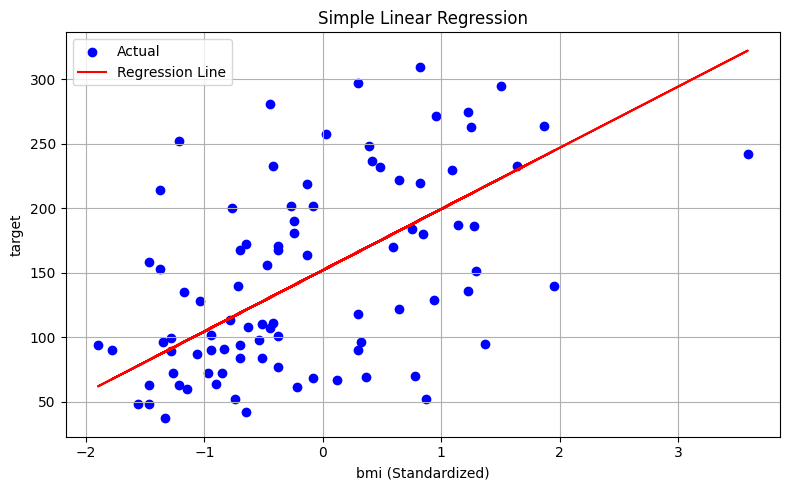


Multiple Linear Regression:
MSE: 2900.193628493481
RMSE: 53.85344583676592
R² Score: 0.4526027629719196


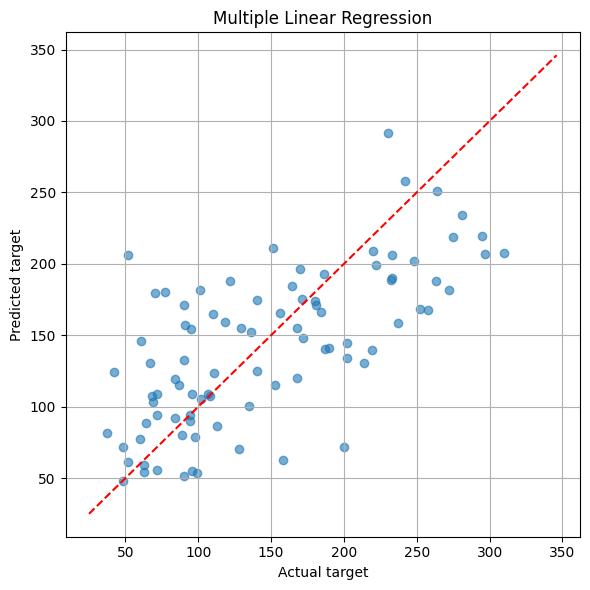

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# ---------- SIMPLE LINEAR REGRESSION ----------
# Use only one feature 'bmi'
X_simple = X_scaled[['bmi']]  # Using 'bmi' as the single feature
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Simple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('bmi (Standardized)')
plt.ylabel('target')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- MULTIPLE LINEAR REGRESSION ----------
# Re-split using all features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\nMultiple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Multiple Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()